In [ ]:
!pip install keras.layers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement keras.layers (from versions: none)
ERROR: No matching distribution found for keras.layers


In [ ]:
# importing the required libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Activation, Dropout, Flatten,Dense
from keras import backend as k
from keras import optimizers

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Define the parameters
img_width, img_height = 224,224 # changing dimension of all images
train_path='/content/drive/MyDrive/brain tumor classification/train'
valid_path1_true='/content/drive/MyDrive/brain tumor classification/test'
#valid_path2_false='/content/drive/MyDrive/brain tumor 100/testing/meningioma'
nb_train_samples = 100 #number of train samples
nb_test_samples= 25 #number of test samples
epoch = 20
batch_size = 16

In [ ]:
if k.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3) 

Feature Extraction Stage

In [ ]:
# Stage of CNN
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# 32 is the number of filters

In [ ]:
# Stage2
model.add(Conv2D(32,(3,3))) # input shape is not included here as output of 1st stage is the input of 2nd stage
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_6 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                  

In [ ]:
# Stage3
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_6 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                  

In [ ]:
# Classification Stage

In [ ]:
model.add(Flatten())#this layer will convert the matrix into array
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))# we will randomly drop 50% input so that we can avoid overtrained
model.add(Dense(2))  #number of classes 
model.add(Activation('softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation_5 (Activation)   (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 109, 109, 32)      9248      
                                                                 
 activation_6 (Activation)   (None, 109, 109, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                  

In [ ]:
# Build the Network
model.compile(loss='categorical_crossentropy',optimizer=optimizers.SGD(learning_rate=0.01),metrics=['accuracy'])

In [ ]:
# image augmentation
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range = 0.2,horizontal_flip=True) # to train we need many images
# but simple we don't have so much image. So we will flip,zoom,rescale etc the image so as to train data.

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

**LOADING THE DATASET**

In [ ]:
train_generator = train_datagen.flow_from_directory(train_path,target_size=(img_width,img_height),
                                                    batch_size=batch_size,class_mode='categorical')

Found 228 images belonging to 2 classes.


In [ ]:
test_generator=test_datagen.flow_from_directory(valid_path1_true,target_size=(img_width,img_height),batch_size=batch_size,class_mode='categorical')

Found 48 images belonging to 2 classes.


In [ ]:
# Training the CNN Model
classifier = model.fit(
    train_generator,
    steps_per_epoch= nb_train_samples//batch_size,
    epochs = epoch,
    validation_data = test_generator,
    validation_steps = nb_test_samples // batch_size
)

Epoch 1/20
6/6 [==============================] - 18s 3s/step - loss: 0.6799 - accuracy: 0.5208 - val_loss: 0.6949 - val_accuracy: 0.5625
Epoch 2/20
6/6 [==============================] - 17s 3s/step - loss: 0.6366 - accuracy: 0.5729 - val_loss: 0.7538 - val_accuracy: 0.4375
Epoch 3/20
6/6 [==============================] - 11s 2s/step - loss: 0.6098 - accuracy: 0.6875 - val_loss: 0.8254 - val_accuracy: 0.5000
Epoch 4/20
6/6 [==============================] - 9s 1s/step - loss: 0.5766 - accuracy: 0.7396 - val_loss: 1.0669 - val_accuracy: 0.3125
Epoch 5/20
6/6 [==============================] - 11s 2s/step - loss: 0.5533 - accuracy: 0.7143 - val_loss: 0.8055 - val_accuracy: 0.6250
Epoch 6/20
6/6 [==============================] - 11s 2s/step - loss: 0.5899 - accuracy: 0.6458 - val_loss: 1.0245 - val_accuracy: 0.5000
Epoch 7/20
6/6 [==============================] - 9s 1s/step - loss: 0.4958 - accuracy: 0.7708 - val_loss: 1.1154 - val_accuracy: 0.6250
Epoch 8/20
6/6 [====================

In [ ]:
# Saving the model
import h5py
model.save('keras_model.h5')

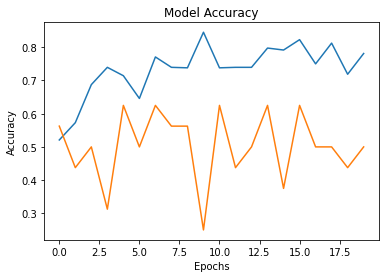

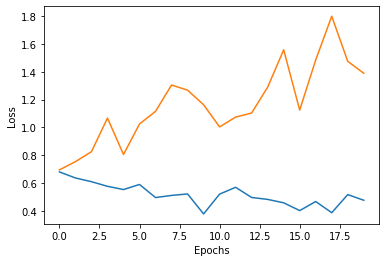

In [ ]:
# Plotting the perfirmance of model
import matplotlib.pyplot as plt
plt.plot(classifier.history['accuracy'])
plt.plot(classifier.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

plt.plot(classifier.history['loss'])
plt.plot(classifier.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()